In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error,f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
X=df.drop(columns=['species'])
y=df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
y_pred = lda.predict(X)

print('Accuracy:', lda.score(X, y))
print('Confusion Matrix:\n', pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted']))
print('F1 Score:', f1_score(y, y_pred, average='weighted'))
print('Precision:', precision_score(y, y_pred, average='weighted'))
print('Recall:', recall_score(y, y_pred, average='weighted'))
print('Classification Report:\n', classification_report(y, y_pred))



Accuracy: 0.98
Confusion Matrix:
 Predicted   setosa  versicolor  virginica
Actual                                   
setosa          50           0          0
versicolor       0          48          2
virginica        0           1         49
F1 Score: 0.9799979997999799
Precision: 0.980125383486728
Recall: 0.98
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



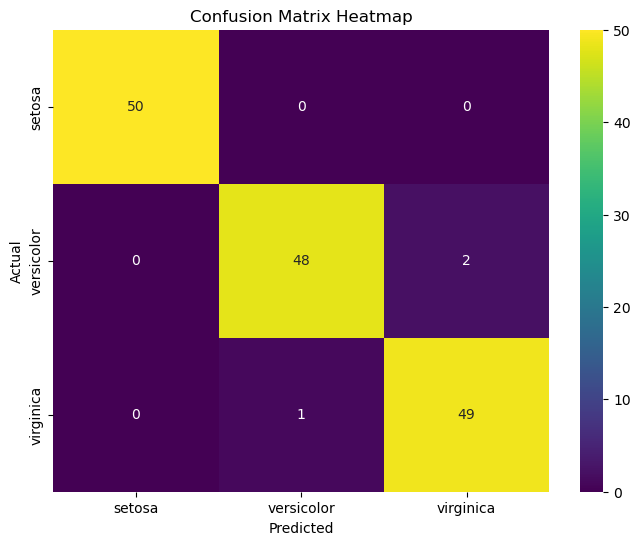

In [18]:
#Making heatmap of confusion matrix
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()